<a href="https://colab.research.google.com/github/Endalebob/deep-learning/blob/main/ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [13]:
data = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) = data.load_data()

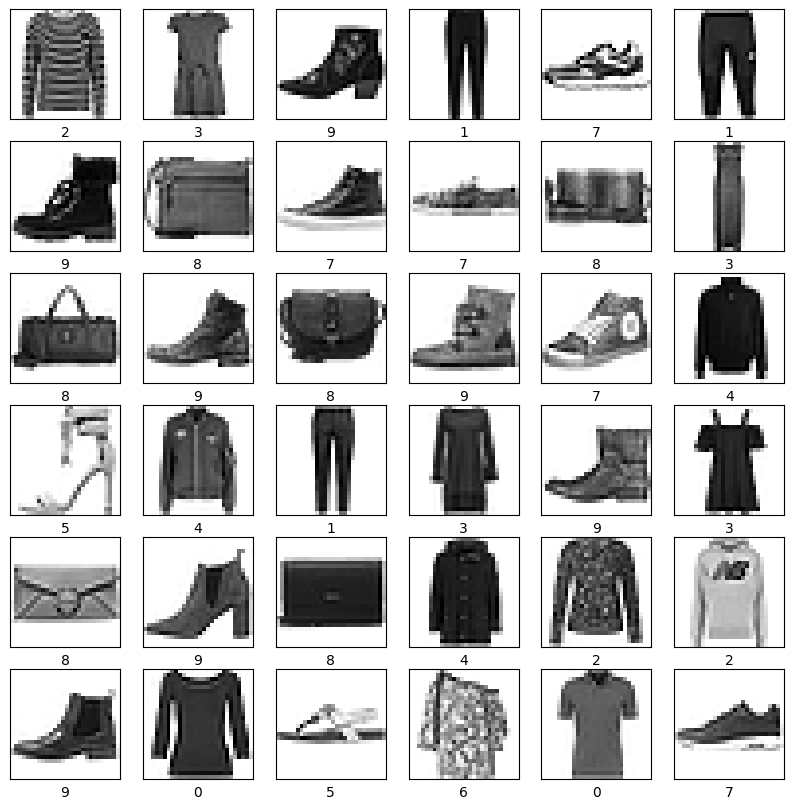

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(training_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(training_labels[image_ind])

In [14]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [15]:
model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dense(10,activation='softmax'),
    ]
)

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4983 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3728 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.8780
Epoch 4/5
1126/1875 [=================>............] - ETA: 2s - loss: 0.3127 - accuracy: 0.8857

In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3498 - accuracy: 0.8753


[0.34980010986328125, 0.8752999901771545]

In [9]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step
[8.7414764e-07 3.1852932e-07 5.3659324e-08 3.0591703e-09 9.2115386e-07
 2.8414082e-02 3.6719746e-07 7.8979935e-03 6.6932562e-06 9.6367872e-01]
9


<h1 style="color: cyan;"> Stoping Training</h1>

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True


In [26]:
callbacks = myCallback()

In [27]:
model.fit(training_images,training_labels,epochs=50,callbacks=[callbacks])

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2595 - accuracy: 0.9031
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9068
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2417 - accuracy: 0.9112
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2325 - accuracy: 0.9134
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2234 - accuracy: 0.9165
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2179 - accuracy: 0.9168
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2126 - accuracy: 0.9202
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2058 - accuracy: 0.9226
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1996 - accuracy: 0.9251
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.193